# Comparison plot for NA pool ratio and NA-Core pool ratio

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [35]:
# Read the data first
mul_list = np.array([2**i for i in range(0, 7)])
method_list = ['NA','Coreset','BALD','QBC','QBC_Div_Den','QBC_Div']
postfix = '_Eff_at_final_target_MSE.txt'
Datasets = ['Sine','Robo','Stack','ADM','Airfoil','Hydro']

In [36]:
eff_dict = {}
df = pd.DataFrame()
for data in Datasets:
    eff_dict[data] = {}
    for method in method_list:
        eff_dict[data][method] = {}
        if method == 'Core-set' and False:
            file_name = os.path.join(method, data, method + postfix)
            eff_list_cur = np.loadtxt(file_name)
            # Make a dataframe for easier plotting
            df_cur = pd.DataFrame(eff_list_cur, columns=['val'])
            df_cur['data'] = data
            df_cur['method'] = method
            df_cur['mul'] = 1
            df = pd.concat([df, df_cur])
            continue
        for mul in mul_list:
            try:
                # Read the file
                file_name = os.path.join(method, data, method + '_mul_' + str(mul) + postfix)
                # print(file_name)
                eff_list_cur = np.loadtxt(file_name)
                # Make a dataframe for easier plotting
                df_cur = pd.DataFrame(eff_list_cur, columns=['val'])
                df_cur['data'] = data
                if method == 'NA':
                    df_cur['method'] = 'NA-QBC'
                else:
                    df_cur['method'] = method
                df_cur['mul'] = mul
                df = pd.concat([df, df_cur])
#                 print(df_cur)
#                 eff_dict[data][method][mul] = eff_list_cur
#                 print('read successful!')
            except:
                print('error in {} {} {}, skip'.format(data, method, mul))

error in Sine NA 2, skip
error in Sine NA 4, skip
error in Sine NA 8, skip
error in Sine NA 16, skip
error in Sine NA 32, skip
error in Sine NA 64, skip
error in Sine Coreset 1, skip
error in Sine BALD 1, skip
error in Sine QBC 1, skip
error in Sine QBC_Div_Den 1, skip
error in Sine QBC_Div 1, skip
error in Robo NA 2, skip
error in Robo NA 4, skip
error in Robo NA 8, skip
error in Robo NA 16, skip
error in Robo NA 32, skip
error in Robo NA 64, skip
error in Robo Coreset 1, skip
error in Robo BALD 1, skip
error in Robo QBC 1, skip
error in Robo QBC_Div_Den 1, skip
error in Robo QBC_Div 1, skip
error in Stack NA 2, skip
error in Stack NA 4, skip
error in Stack NA 8, skip
error in Stack NA 16, skip
error in Stack NA 32, skip
error in Stack NA 64, skip
error in Stack Coreset 1, skip
error in Stack BALD 1, skip
error in Stack QBC 1, skip
error in Stack QBC_Div_Den 1, skip
error in Stack QBC_Div 1, skip
error in ADM NA 2, skip
error in ADM NA 4, skip
error in ADM NA 8, skip
error in ADM NA 1

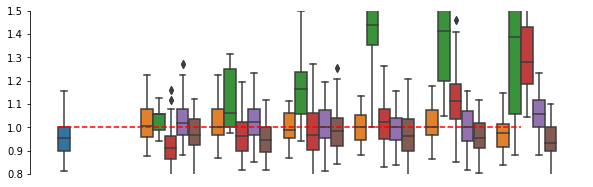

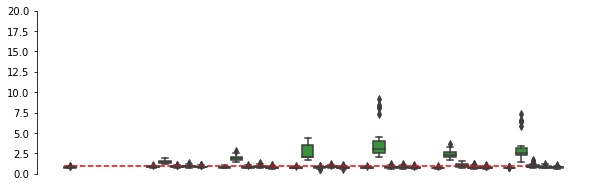

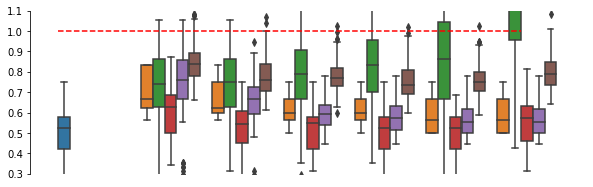

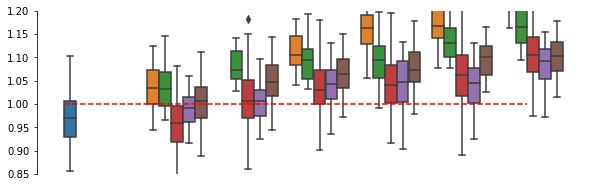

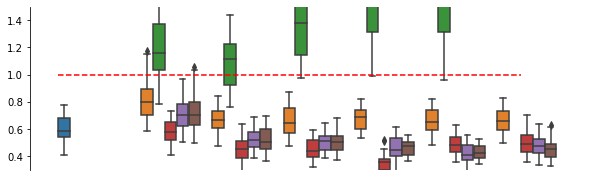

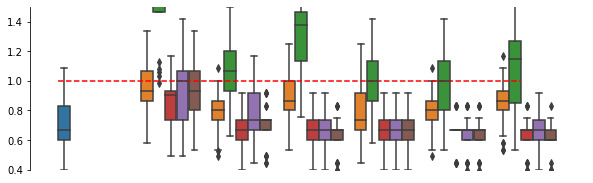

In [39]:
import seaborn as sns
focus = False
focus = True
for data in Datasets:
    f = plt.figure(figsize=[10,3])
    sns.boxplot(x='mul', y='val', hue="method", data=df.loc[df['data']==data, :], dodge=True, width=1)
    if focus:
        if 'Sine' in data:
            plt.ylim([0.8, 1.5])
        if 'Robo' in data:
            plt.ylim([0, 20])
        if 'Stack' in data:
            plt.ylim([0.3, 1.1])
        if 'ADM' in data:
            plt.ylim([0.85, 1.2])
        if 'Air' in data:
            plt.ylim([0.3, 1.5])
        if 'Hydro' in data:
            plt.ylim([0.4, 1.5])
            
    ax = plt.gca()
    sns.despine(offset=-2, bottom=True, trim=False)
    ax.get_xaxis().set_visible(False)
#     plt.title('pool ratio plot for ' + data)
    plt.plot([-0.5, len(mul_list)-1],[1, 1],'r--')
    ax.legend().set_visible(False)
    plt.ylabel('')
#     plt.legend(False)
    plt.savefig('{}_rebuttal_extra.png'.format(data), transparent=True,dpi=300)

## Round robin experiment
### Take one dataset as training set (to set the pool ratio) and use that pool ratio on the other test set

In [48]:
# First setup the optimal pool size, these numbers are obtained from comparing and getting the best performing one manually
optimal_pool_size = {}
optimal_pool_size['BALD'] = {'Sine':2,'Robo':2,'Stack':4,'ADM':2,'Airfoil':4,'Hydro':16}
optimal_pool_size['QBC'] = {'Sine':2,'Robo':8,'Stack':16,'ADM':2,'Airfoil':16,'Hydro':64}
optimal_pool_size['QBC_Div'] = {'Sine':64,'Robo':16,'Stack':16,'ADM':2,'Airfoil':32,'Hydro':16}
optimal_pool_size['QBC_Div_Den'] = {'Sine':8,'Robo':32,'Stack':32,'ADM':2,'Airfoil':32,'Hydro':32}
optimal_pool_size['Coreset'] = {'Sine':64,'Robo':64,'Stack':64,'ADM':2,'Airfoil':8,'Hydro':16}

df_round = pd.DataFrame()

Datasets = ['Sine','Robo','Stack','ADM','Airfoil','Hydro']
method_list = ['NA-QBC','Coreset','BALD','QBC','QBC_Div_Den','QBC_Div']


# First loop over datasets
for data in Datasets:
    # Then loop over the methods
    for method in method_list:
        # If this is a round robin method
        if method in optimal_pool_size:
            for data_train in Datasets:
                # Ignore itself as training piece
                if data_train == data:
                    continue
                # Extrac thte best mult factor (pool ratio)
                best_mul = optimal_pool_size[method][data_train]
                df_cur = df.loc[np.logical_and(np.logical_and(df['data']==data, df['method']==method),df['mul']==best_mul), :]
                df_round = pd.concat([df_round, df_cur])
        else: # This is NA or Coreset
            print('This is ', method)
            df_cur = df.loc[np.logical_and(df['data']==data, df['method']==method), :]
            df_round = pd.concat([df_round, df_cur])            


This is  NA-QBC
This is  NA-QBC
This is  NA-QBC
This is  NA-QBC
This is  NA-QBC
This is  NA-QBC


In [49]:
df_round['method'] == 'Core-Set'

0     False
1     False
2     False
3     False
4     False
      ...  
20    False
21    False
22    False
23    False
24    False
Name: method, Length: 8700, dtype: bool

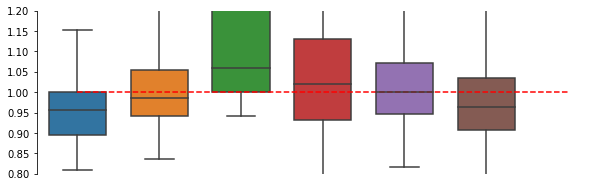

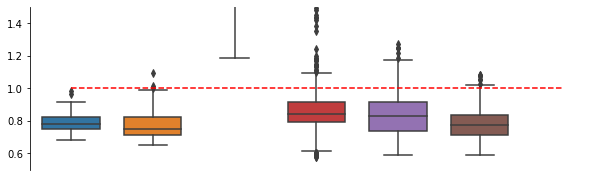

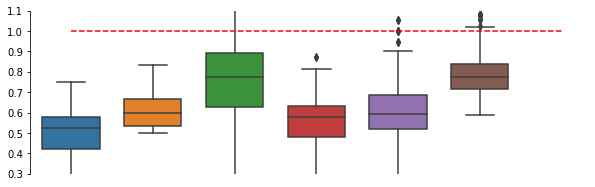

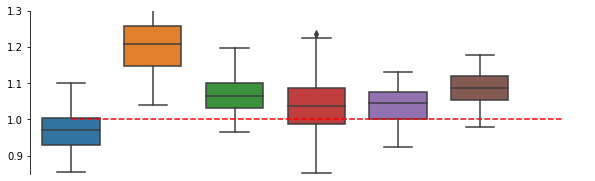

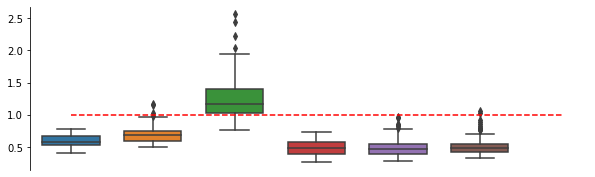

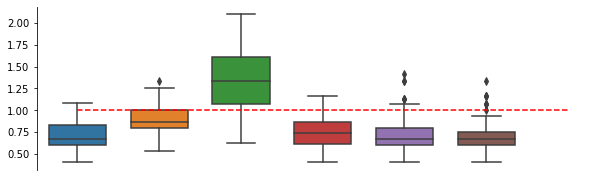

In [68]:
focus = False
focus = True
for data in Datasets:
    f = plt.figure(figsize=[6,3])
    sns.boxplot(x='method', y='val', data=df_round.loc[df_round['data']==data, :], 
                dodge=True, width=0.7)
    if focus:
        if 'Sine' in data:
            plt.ylim([0.8, 1.2])
        if 'Robo' in data:
            plt.ylim([0.5, 1.5])
        if 'Stack' in data:
            plt.ylim([0.3, 1.1])
        if 'ADM' in data:
            plt.ylim([0.85, 1.3])
            
    ax = plt.gca()
    sns.despine(offset=0, bottom=True, trim=False)
    ax.get_xaxis().set_visible(False)
#     plt.title('pool ratio plot for ' + data)
    plt.plot([0, len(mul_list)-1],[1, 1],'r--')
#     ax.legend().set_visible(False)
    plt.ylabel('')
#     plt.legend(False)
    plt.savefig('{}_round_robin.png'.format(data), transparent=True,dpi=300)

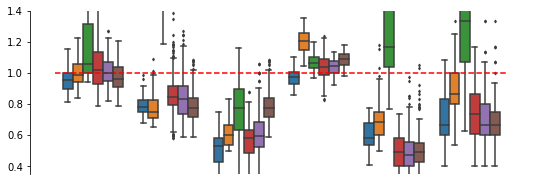

In [70]:
f = plt.figure(figsize=[9, 3])
sns.boxplot(x='data', y='val', hue="method", data=df_round, 
            dodge=True, width=0.8, fliersize=2)
plt.ylim([0.35,1.4])
ax = plt.gca()
sns.despine(offset=0, bottom=True, trim=False)
ax.get_xaxis().set_visible(False)
plt.plot([-0.5, len(mul_list)-1.5],[1, 1],'r--')
ax.legend().set_visible(False)
plt.ylabel('')
#     plt.legend(False)
plt.savefig('round_robin_combined.png', transparent=True,dpi=300)

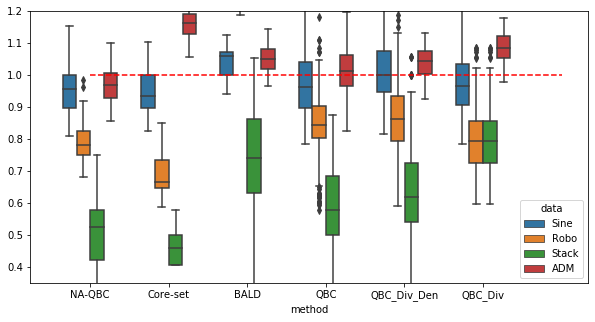

In [94]:
focus = False
# focus = True
# for data in Datasets:
f = plt.figure(figsize=[10, 5])
sns.boxplot(x='method', y='val', hue='data', data=df_round, dodge=True, width=0.7)
# if focus:
#     if 'Sine' in data:
#         plt.ylim([0.8, 1.2])
#     if 'Robo' in data:
#         plt.ylim([0.5, 1.5])
#     if 'Stack' in data:
#         plt.ylim([0.3, 1.1])
#     if 'ADM' in data:
#         plt.ylim([0.85, 1.3])

plt.ylim([0.35, 1.2])
ax = plt.gca()
# sns.despine(offset=0, bottom=True, trim=False)
# ax.get_xaxis().set_visible(False)
#     plt.title('pool ratio plot for ' + data)
plt.plot([0, len(mul_list)-1],[1, 1],'r--')
# ax.legend().set_visible(False)
plt.ylabel('')
# plt.legend(False)
plt.savefig('{}_agg_round'.format(data), transparent=True,dpi=300)